# Boston 
Data Analysis and ML project regarding the boston data set.

## Importing required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline
from scipy.io import arff
pd.options.mode.chained_assignment = None

## Retrieving the Data

The data is from the [Boston Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) which is collected by the U.S Census Service. The data concerns housing in the Boston area. The data can be downloaded [here](https://www.openml.org/search?type=data&sort=runs&id=531&status=active).

In [9]:
data = arff.loadarff('C:/Users/jacob/Downloads/boston.arff')
boston = pd.DataFrame(data[0])

The data set has 14 columns and 506 rows of data points. The columns in the data set are:

##### CRIM - per capita crime rate by town
##### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
##### INDUS - proportion of non-retail business acres per town.
##### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##### NOX - nitric oxides concentration (parts per 10 million)
##### RM - average number of rooms per dwelling
##### AGE - proportion of owner-occupied units built prior to 1940
##### DIS - weighted distances to five Boston employment centres
##### RAD - index of accessibility to radial highways
##### TAX - full-value property-tax rate per 10,000 dollars
##### PTRATIO - pupil-teacher ratio by town
##### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
##### LSTAT - % lower status of the population
##### MEDV - Median value of owner-occupied homes in 1000 dollars



In [532]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [533]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    object 
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), object(2)
memory usage: 55.5+ KB


In [534]:
boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## Organizing Data
The data set is already cleaned and contains zero null values, as all columns shown in boston.info() have 506 non-null values.
However the data must be reorganized in order to perform analysis.

In [535]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,b'0',0.538,6.575,65.2,4.0900,b'1',296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,b'0',0.469,6.421,78.9,4.9671,b'2',242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,b'0',0.469,7.185,61.1,4.9671,b'2',242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,b'0',0.458,6.998,45.8,6.0622,b'3',222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,b'0',0.458,7.147,54.2,6.0622,b'3',222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,b'0',0.458,6.430,58.7,6.0622,b'3',222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,b'0',0.524,6.012,66.6,5.5605,b'5',311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,b'0',0.524,6.172,96.1,5.9505,b'5',311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,b'0',0.524,5.631,100.0,6.0821,b'5',311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,b'0',0.524,6.004,85.9,6.5921,b'5',311.0,15.2,386.71,17.10,18.9


The variable CHAS is a dummy variable whether the tract borders the Charles River or not. However the values for the column CHAS is either b'0' or b'1' and not 0/1. To convert b'0' to 0 and b'1' to 1 a for loop is used.

In [536]:
for i in range(len(boston)):
    
    if boston['CHAS'][i] == b'0':
        boston['CHAS'][i] = 0
    
    else:
        boston['CHAS'][i] = 1
        

The variable RAD, which is the index of accessibility to radial highways, must also be converted. The index values are integers ranging between 1-8.

In [537]:
print(boston['RAD'].max())
print(boston['RAD'].min())

b'8'
b'1'


In [538]:
for i in range(len(boston)):
    
    if boston['RAD'][i] == b'1':
        boston['RAD'][i] = 1
        
    elif boston['RAD'][i] == b'2':
        boston['RAD'][i] = 2
        
    elif boston['RAD'][i] == b'3':
        boston['RAD'][i] = 3
    
    elif boston['RAD'][i] == b'4':
        boston['RAD'][i] = 4
    
    elif boston['RAD'][i] == b'5':
        boston['RAD'][i] = 5
    
    elif boston['RAD'][i] == b'6':
        boston['RAD'][i] = 6
    
    elif boston['RAD'][i] == b'7':
        boston['RAD'][i] = 7
    
    else:
        boston['RAD'][i] = 8

The variables RAD and CHAS has been converted into numeric values. However the data type for these variables are still not float, which is needed for analysis. As such, they are converted to a float data type.

In [539]:
boston = boston.astype({'RAD':'float','CHAS':'float'})

In [540]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


The data is now transformed and ready for analysis.

## Exploratory Data Analysis

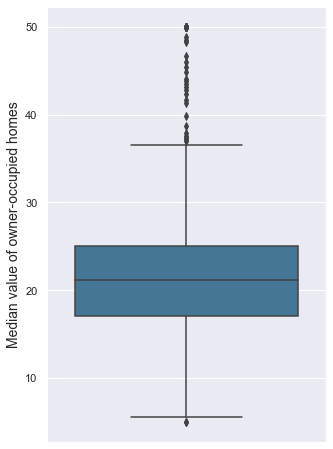

In [541]:
plt.figure(figsize=(5,8))
hfont = {'fontname':'Arial'}
sns.boxplot(y='MEDV',data=boston,palette='mako')
plt.ylabel('Median value of owner-occupied homes',fontsize=14, **hfont)
sns.set_theme()

The boxplot shows a symmetric distribution of home values with a mean of 20,000 dollars. Fifty percent of homes lie in a relatively small intervall, 18,000 - 25,000 dollars. At the same time there are numerous extreme values, particularily high extreme values that reach as high as 50,000 dollars. 

Text(0, 0.5, 'Count')

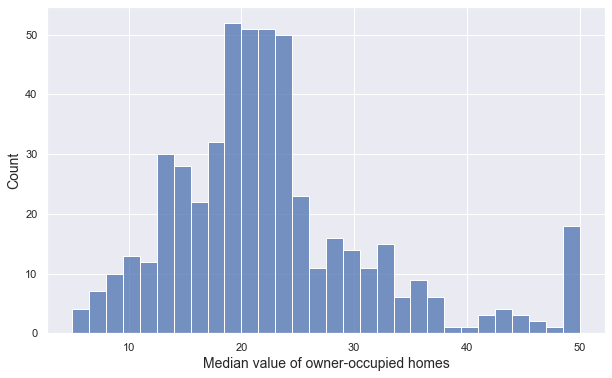

In [542]:

plt.figure(figsize=(10,6))
sns.histplot(x='MEDV',data=boston,palette='mako',bins=30)
plt.xlabel('Median value of owner-occupied homes',fontsize=14, **hfont)
plt.ylabel('Count',fontsize=14, **hfont)

The histogram of home values shows a similiar result as in the boxplot. Most homes are valued in the 18,000 - 25,000 dollars intervall and the distribution somewhat follows a normal distribution, except for a large spike in the 50,000 dollars range. From the histogram it seems that most house values follow a normal distribution except for a spike in the highest range of house values.

Text(0.5, 1.0, 'Correlation: Median value of owner-occupied homes')

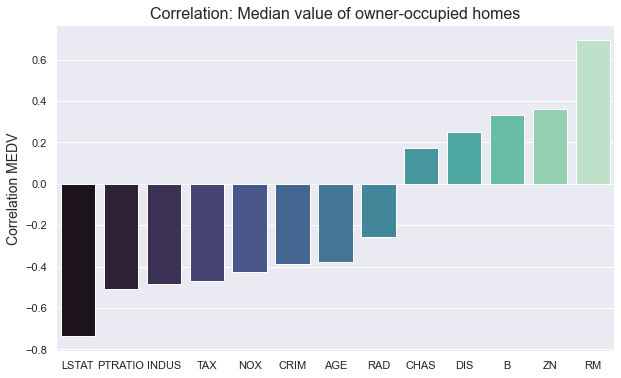

In [543]:
boston_corr = boston.corr()['MEDV'].sort_values().drop('MEDV')
boston_corr = boston_corr.to_frame().reset_index()


plt.figure(figsize=(10,6))
barplot = sns.barplot(data=boston_corr,y='MEDV',x='index',palette='mako')
plt.xlabel('')
plt.ylabel('Correlation MEDV', fontsize=14, **hfont)
plt.title('Correlation: Median value of owner-occupied homes',fontsize=16, **hfont)

From the graph above we can see that average number of rooms per dwelling has a strong positive correlation with home values. The percent of lower status of the population has the strongest negative correlation with home values among the variables in the dataset. 

Four other variables are positively correlated with home value;  weighted distances to five Boston employment centres (DIS),  1000(Bk - 0.63)^2 (where Bk is the proportion of blacks by town), proportion of residential land zoned for lots over 25,000 sq.ft. and if the tract is bounds the river. 

The rest of the variables; acessability to highways, age, crime rate, nitric oxide concentration, property tax, proportion of non-retail business acres per town and pupil-ratio had a negative correlation with home value.

Text(0, 0.5, 'Median value of owner occupied homes')

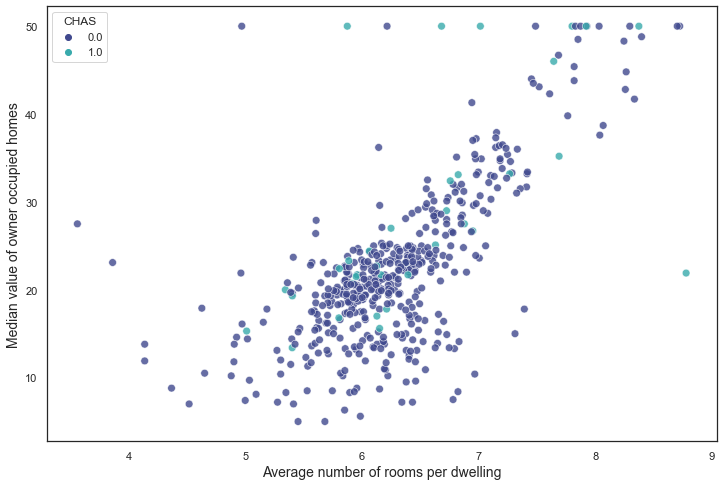

In [544]:
sns.set_theme(style="white")
plt.figure(figsize=(12,8))
sns.scatterplot(data=boston,y="MEDV",x="RM",hue="CHAS",palette="mako",s=60, alpha=0.8)
plt.xlabel('Average number of rooms per dwelling', fontsize=14, **hfont)
plt.ylabel('Median value of owner occupied homes', fontsize=14, **hfont)


From the scatterplot above there seems to be a strong relationship between average number of rooms per dwelling and median value of homes. At the same time there doesn't seem to be a strong relationship between the value of homes and whether the tract bounds the river.

Text(0, 0.5, 'Median value of owner occupied homes')

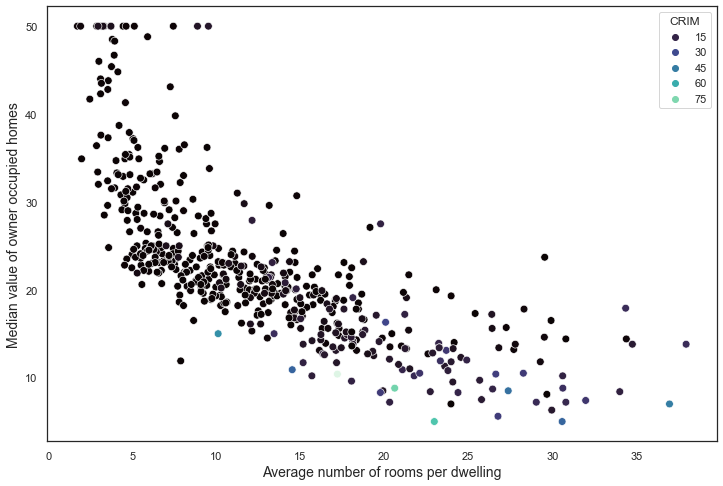

In [545]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=boston,y="MEDV",x="LSTAT",hue="CRIM",palette="mako",s=60)
plt.xlabel('Average number of rooms per dwelling', fontsize=14, **hfont)
plt.ylabel('Median value of owner occupied homes', fontsize=14, **hfont)

There seems to be a negative relationship between percentage of lower status of the population and median house value, as can be seen in the scatterplot above. There also seem to be a negative relationship between crime rate and median house value. For the overwhelming majority of data points the crime rate is very low. The data points which have a higher crime rate also have a house value which is lower than the median.

## Cluster analysis

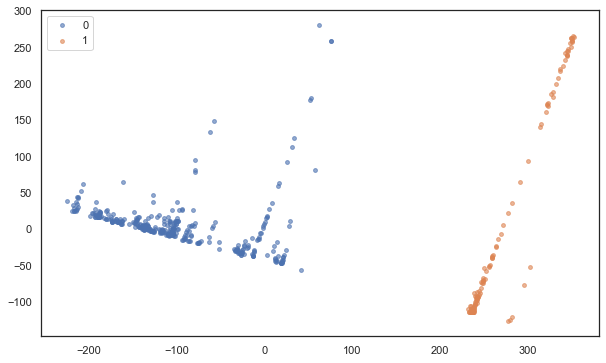

In [546]:
from sklearn.decomposition import PCA

pca = PCA(2)

#Using PCA to reduce the number of dimensions to 2 in order to visualize the data.
boston_pca = pca.fit_transform(boston)

boston_pca.shape

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

label = kmeans.fit_predict(boston_pca)

#Getting unique values of labels 
u_labels = np.unique(label)

plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(boston_pca[label == i , 0] , boston_pca[label == i , 1] , label = i, s=15, marker='o', alpha=0.6)
plt.legend()

From the scatterplot of K-means clusters above, there seems to be a distinct divide within the data set in to two clusters. It is possible that this divide is due to the previously mentioned spike of high value homes in the data set and the remaining house values, which somewhat follows a normal distribution. 

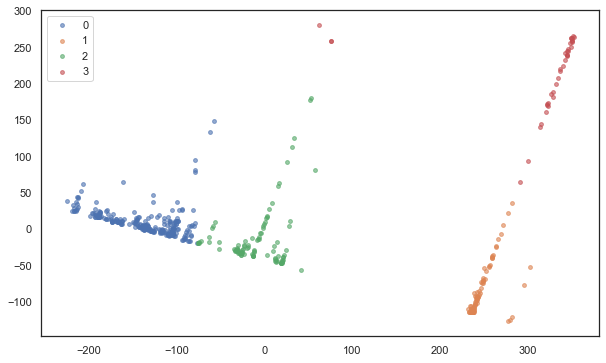

In [547]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(boston_pca)

u_labels = np.unique(label)

plt.figure(figsize=(10,6))

for i in u_labels:
    plt.scatter(boston_pca[label == i , 0] , boston_pca[label == i , 1] , label = i, s=15, marker='o', alpha=0.6)
plt.legend()

Further dividing the data into four clusters doesn't result in clear and distinct clusters. As such, futher division of the data set into more and more clusters, does not seem to provide new information.  

## Linear Regression
The boston data set can be used in conjunction with the sci-kit learn library to create a linear regression model, in order to predict the median value of owner-occupied homes.

### Splitting data into test set and training set 
First the data is split into test and training data using sklearn train test split.

In [548]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.drop("MEDV",axis=1), boston['MEDV'], test_size=0.3, random_state=101)

### Training the model, linear regression
After splitting the data we import and create an instance of LinearRegression from sklearn.

In [549]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

After creating an instance we fit the training data.

In [550]:
lm.fit(X_train,y_train)

LinearRegression()

After we fitted the training data we can print out the coefficients for the linear regression model.

##### Coefficients for the model:

In [551]:
coeffecients = pd.DataFrame(lm.coef_,boston.drop("MEDV",axis=1).columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CRIM,-0.058946
ZN,0.052892
INDUS,0.001807
CHAS,3.821056
NOX,-16.551318
RM,3.410358
AGE,0.008017
DIS,-1.467059
RAD,0.475388
TAX,-0.003883


### Predicting test data
After fitting the data we can use the linear model that was created to make predictions based of the test data.

In [552]:
predictions = lm.predict(X_test)

After making predictions using the linear regression model we can then plot the predicted y values and the real y values on a scatterplot. 

Text(0, 0.5, 'predictions')

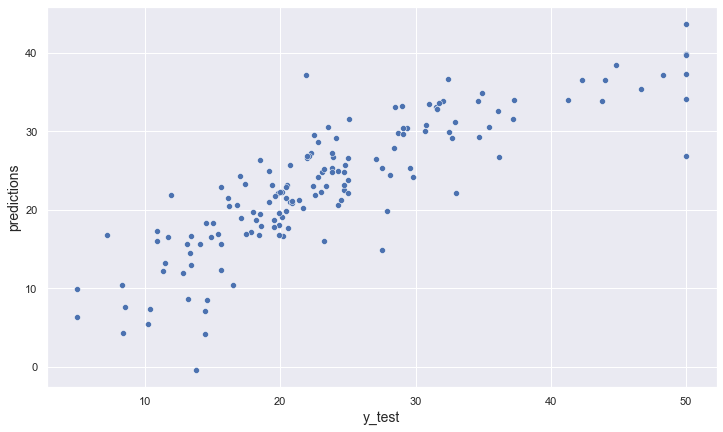

In [553]:
plt.figure(figsize=(12,7))
sns.set_theme()
sns.scatterplot(x = y_test, y = predictions, palette="mako")
plt.xlabel('y_test', fontsize=14, **hfont)
plt.ylabel('predictions', fontsize=14, **hfont)

From the scatterplot above we can see that the dots do follow somewhat of a linear pattern, but there seems to be significant degree of variance.

### Evaluating the Model
Metrics from sklearn are imported and implemented to calculate mean absolute error, mean squared error and root mean squared error.

In [554]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.9090433649172653
MSE: 29.058246271971495
RMSE: 5.390570124947035


Additionally, the residuals can be plotted on a histogram plot.

Text(0.5, 1.0, 'Residuals')

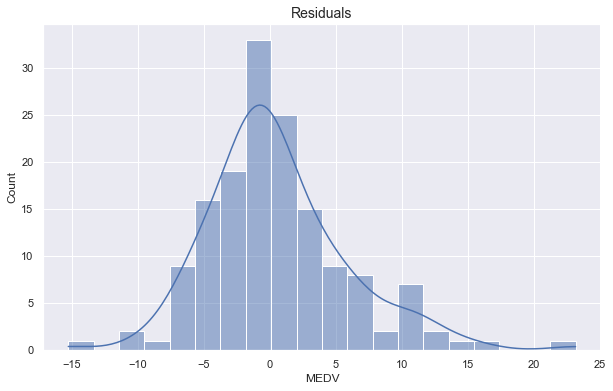

In [555]:
plt.figure(figsize=(10,6))
sns.set_theme()
sns.histplot((y_test-predictions),bins=20, kde=True)
plt.title("Residuals",fontsize=14, **hfont)

From observing the histogram above, the residuals seem to be normally distributed around 0. The variance of the residuals is quite high.

## Neural Network / Deep Learning

### Splitting data into test set and training set 

In [15]:
from sklearn.model_selection import train_test_split

X = boston.drop("MEDV",axis=1).values
y = boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling the data
The data is standardized using sklearn MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

###  Importing required libraries from tensorflow

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

###  Building the model
The model consists of an input layers of 13 neurons (matching the number of variables in the model), 7 hidden layers (5 layers with 13 neurons and 2 with 5 neurons) and an output layer. For the input layer and all hidden layers the model uses the Rectified Linear Unit (ReLU) as the activation function. The optimizer Adam was chosen as the gradient descent algorithm for the model, as it is very efficient. Mean squared error was chosen as the loss parameter for the model. 

Dropout layers was first implemented in the model, but after numerous tries it was concluded that adding dropout layers resulted in worse estimations. Even without adding dropout layers the model did not suffer from overfitting. Due to worse results and no significant improvement in overfitting, no dropout layers were implemented in the model.

In [5]:
model = Sequential()

model.add(Dense(13, activation='relu'))

model.add(Dense(13, activation='relu'))

model.add(Dense(13, activation='relu'))

model.add(Dense(13, activation='relu'))

model.add(Dense(13, activation='relu'))

model.add(Dense(13, activation='relu'))

model.add(Dense(5,activation='relu'))

model.add(Dense(5, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

###  Implementing early stop
Early stopping was implemented in the model to combat potential overfitting of the data.

In [7]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

###  Training the model

In [516]:
model.fit(x=X_train,y=y_train,epochs=10000, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10000
12/12 [==============================] - 1s 13ms/step - loss: 559.1531 - val_loss: 664.1029
Epoch 2/10000
12/12 [==============================] - 0s 3ms/step - loss: 555.4368 - val_loss: 658.8385
Epoch 3/10000
12/12 [==============================] - 0s 4ms/step - loss: 549.2695 - val_loss: 649.4252
Epoch 4/10000
12/12 [==============================] - 0s 4ms/step - loss: 537.1778 - val_loss: 630.4910
Epoch 5/10000
12/12 [==============================] - 0s 3ms/step - loss: 512.6216 - val_loss: 591.3917
Epoch 6/10000
12/12 [==============================] - 0s 3ms/step - loss: 462.3292 - val_loss: 512.8809
Epoch 7/10000
12/12 [==============================] - 0s 4ms/step - loss: 367.0664 - val_loss: 371.4670
Epoch 8/10000
12/12 [==============================] - 0s 4ms/step - loss: 215.2053 - val_loss: 190.9041
Epoch 9/10000
12/12 [==============================] - 0s 4ms/step - loss: 108.8702 - val_loss: 136.7838
Epoch 10/10000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 9.2224 - val_loss: 19.1906
Epoch 158/10000
12/12 [==============================] - 0s 3ms/step - loss: 9.2739 - val_loss: 18.6703
Epoch 159/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9794 - val_loss: 19.0080
Epoch 160/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.9041 - val_loss: 18.8330
Epoch 161/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.0655 - val_loss: 19.5206
Epoch 162/10000
12/12 [==============================] - 0s 4ms/step - loss: 9.3086 - val_loss: 18.8323
Epoch 163/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.9380 - val_loss: 19.0566
Epoch 164/10000
12/12 [==============================] - 0s 3ms/step - loss: 9.5995 - val_loss: 19.4643
Epoch 165/10000
12/12 [==============================] - 0s 3ms/step - loss: 8.8455 - val_loss: 18.3638
Epoch 166/10000
12/12 [==============================] - 0s 4ms/step - loss: 8.8

Epoch 236/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.0262 - val_loss: 17.4858
Epoch 237/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.1703 - val_loss: 17.8162
Epoch 238/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.1995 - val_loss: 18.1055
Epoch 239/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.2317 - val_loss: 17.5135
Epoch 240/10000
12/12 [==============================] - 0s 3ms/step - loss: 7.3398 - val_loss: 17.4378
Epoch 241/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.2155 - val_loss: 16.7959
Epoch 242/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.5514 - val_loss: 17.1419
Epoch 243/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.4055 - val_loss: 18.1857
Epoch 244/10000
12/12 [==============================] - 0s 4ms/step - loss: 7.3741 - val_loss: 18.5736
Epoch 245/10000
12/12 [==============================] - 0s 4ms/

###  Plotting loss and validation loss of the model
As can be seen in the graph below bot loss and validation loss from the model decreases over time. The model also does not suffer from overfitting.

<AxesSubplot:>

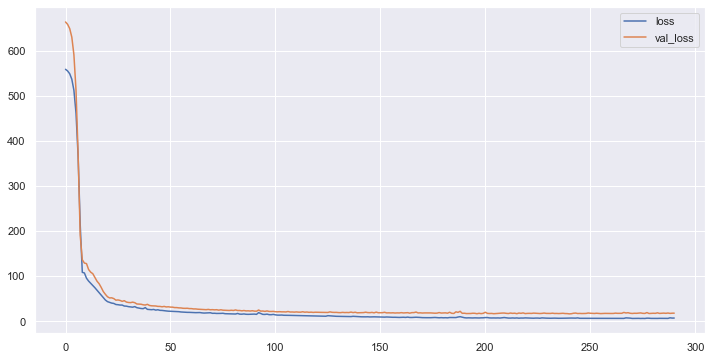

In [517]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot(figsize=(12,6))

### Predicting values using X_test

In [519]:
test_pred = model.predict(X_test)

5/5 [==============================] - 0s 997us/step


After predicting values using X_test, a dataframe consisting of predicted values and true values is created.

In [520]:
test_pred = pd.Series(test_pred.reshape(152,))

pred_df = pd.DataFrame(y_test)

pred_df = pd.concat([pred_df,test_pred],axis=1)

pred_df.columns = ['Test True MEDV','Model Predictions']

pred_df

,Test True MEDV,Model Predictions
0,50.0,47.823372
1,36.2,28.082014
2,11.7,19.022417
3,14.9,14.403540
4,30.8,29.856766
...,...,...
147,28.1,24.621088
148,20.7,21.843704
149,29.1,28.034765
150,17.5,18.529284


The predicted and the true MEDV values are plotted on a scatterplot. The points overall follow a linear pattern, which indicates that the model has some predictive power. However there are some outliers, which do not align with the linear pattern.

<AxesSubplot:xlabel='Test True MEDV', ylabel='Model Predictions'>

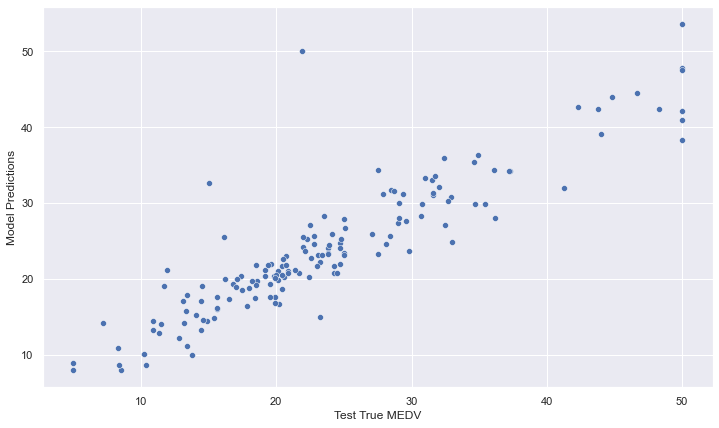

In [521]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pred_df, x='Test True MEDV',y='Model Predictions')

###  Evaluating the model

In [522]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pred_df['Test True MEDV'],pred_df['Model Predictions'])
print(f'MAE: {mse}')

mse = mean_squared_error(pred_df['Test True MEDV'],pred_df['Model Predictions'])
print(f'MSE: {mse}')

rmse = np.sqrt(mean_squared_error(pred_df['Test True MEDV'],pred_df['Model Predictions']))
print(f'RMSE: {rmse}')

MAE: 14.861703848532933
MSE: 18.40077470945649
RMSE: 4.28961241949159


The mean squared error and the root mean squared error shows significant improvement from the linear regression model. Overall, the model performed quite well and the predictive power of the deep learning model was greater than the regression model.

Text(0.5, 1.0, 'Residuals')

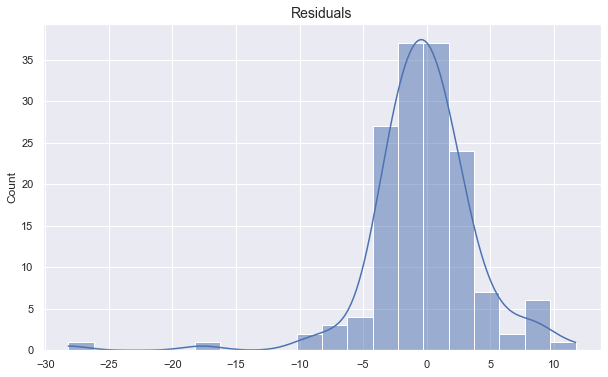

In [523]:
plt.figure(figsize=(10,6))
sns.set_theme()
res = pred_df['Test True MEDV'] - pred_df['Model Predictions']
sns.histplot(res,bins=20, kde=True)
plt.title("Residuals",fontsize=14, **hfont)

The residuals, shown in the histogram above, are concentrated between -5 and 5. The variance of the residuals are lower using the deep learning model compared to the linear regression model.